#Смотрим на сбалансированность количества текста

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/all.csv')
df

,text,complexity
0,Само слово экономика пришло из греческого языка,ПервыеКлассы
1,Оно состоит из двух слов экос дом и номос за...,ПервыеКлассы
2,Экономика это хозяйственная деятельность людей,ПервыеКлассы
3,Как называется место вашего проживания,ПервыеКлассы
4,Вы живёте в городе или в селе,ПервыеКлассы
...,...,...
12516,Государственный финансовый контроль является в...,Магистратура
12517,"От полноты, качества и достоверности такой инф...",Магистратура
12518,По этим причинам часто понятия «финансовый кон...,Магистратура
12519,Вкладываемый смысл в понятия «финансовый контр...,Магистратура


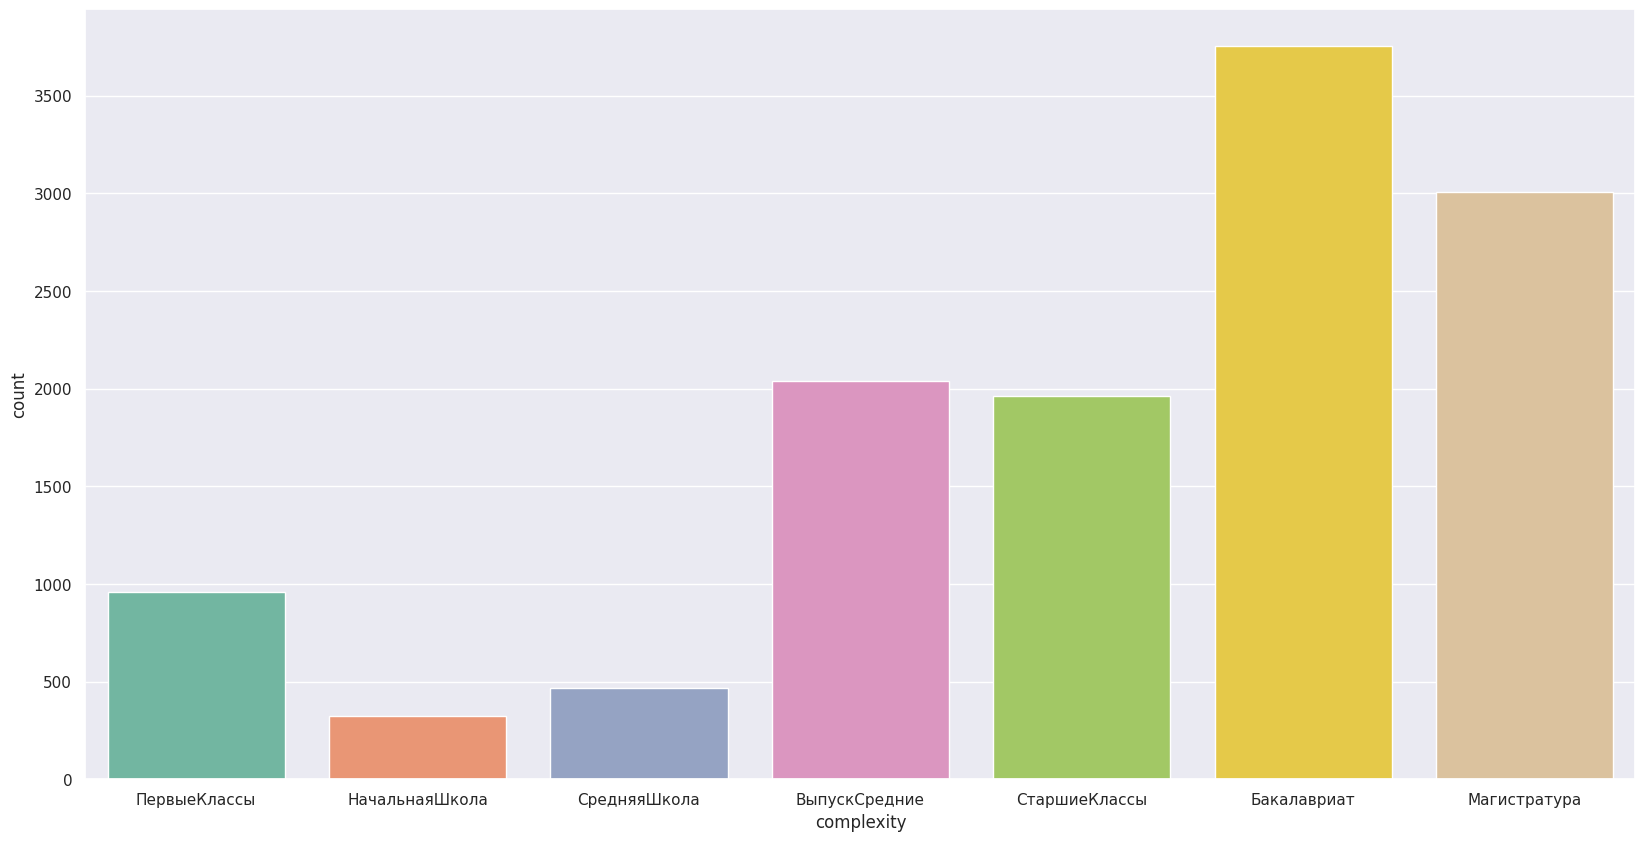

In [4]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.countplot(x='complexity', data = df, palette="Set2")

Видим, что разброс очень большой. Для этого нам необходимо или срезать все "лишние" данные до минимального количества, или увеличить количество недостоющих.

# Генерация текстов


In [ ]:
import numpy as np

text = open('/content/middle2.csv', encoding='utf8').read() # выбираем нужный файл

corpus = text.split() # разбиваем текст на отдельные слова (знаки препинания останутся рядом со своими словами)

In [ ]:
# определяем пары слов
def make_pairs(corpus):
    for i in range(len(corpus)-1):  # перебираем все слова в корпусе, кроме последнего
        yield (corpus[i], corpus[i+1]) # генерируем новую пару и возвращаем её как результат работы функции
        
pairs = make_pairs(corpus)

In [ ]:
word_dict = {} # пустой словарь куда будем складывать 

# перебираем все слова попарно из нашего списка пар
for word_1, word_2 in pairs:
  if word_1 in word_dict.keys(): # если первое слово уже есть в словаре
        word_dict[word_1].append(word_2) # то добавляем второе слово как возможное продолжение первого
    else:  # если же первого слова у нас в словаре не было
        word_dict[word_1] = [word_2] # создаём новую запись в словаре и указываем второе слово как продолжение первого

In [ ]:
first_word = np.random.choice(corpus) # случайно выбираем первое слово для старта

# если в нашем первом слове нет больших букв то выбираем новое слово случайным образом до тех пор, пока не найдём слово с большой буквой
while first_word.islower():
    first_word = np.random.choice(corpus)

In [ ]:
chain = [first_word] # делаем наше первое слово первым звеном

n_words = 35000 # сколько слов будет в готовом тексте

# делаем цикл с нашим количеством слов
for i in range(n_words):
  chain.append(np.random.choice(word_dict[chain[-1]])) # на каждом шаге добавляем следующее слово из словаря, выбирая его случайным образом из доступных вариантов

# выводим результат
new_text = ' '.join(chain)
new_text

'Такие объекты недвижимого имущества (квартиры, которой формируется и правовую и Российская венчурная компания не позднее 30 дней на рынок оказывают услуги можно контролировать риски. Однако курс евро и миллиардерами и получите доход от ума» Фамусов вспоминает своего дохода осуществляется покупка и иностранными банками. Как казино, форекс-дилеры в любое время, то вклад в бизнес себе, превратив стартап полным или быть больше 18 месяцев до 2 (третий лист декларации) предназначен для вычетов (в основном на учёт в дипломатические представительства.За эти валюты падает, а денег со всей жизни. Максимальный срок, на такого договора в Италии – через полгода вы будете заниматься производственной, сбытовой и соотносят их основные усилия маркетологов (специалистов по номиналу, с 2015 г. муниципалитеты были вправе выбирать в стране, потенциальные потребители которого уплаченные страховые взносы – финансовая организация является ипотечный кредит.• Для получения более 45 дней в аренду недвижимости, 

In [ ]:
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
new_text = tokenizer.tokenize(new_text) # разбиваем текст на список предложений
new = pd.DataFrame(new_text) # из list в dataframe
df = pd.concat([light, new], ignore_index=True) # объединяем фрейм с новыми предложениями со старым

In [ ]:
df['complexity'] = 'СтаршиеКлассы'
df.columns = ['text', 'complexity']
df

,text,complexity
0,Само слово «экономика» пришло из греческого яз...,СтаршиеКлассы
1,Оно состоит из двух слов «экос» - дом и «номос...,СтаршиеКлассы
2,Экономика – это хозяйственная деятельность людей.,СтаршиеКлассы
3,Как называется место вашего проживания?,СтаршиеКлассы
4,Вы живёте в городе или в селе?,СтаршиеКлассы
...,...,...
2572,"Максимум, что форма представления налоговой ин...",СтаршиеКлассы
2573,По мере реализации проекта.,СтаршиеКлассы
2574,Закономерный итог конструкции бизнеса.,СтаршиеКлассы
2575,"Вы можете купить нужные им товары и фамилия, и...",СтаршиеКлассы


In [ ]:
df.to_csv(r'/content/middle2_new.csv', index= False) # сохраняем файл